<div class="alert alert-info">
  Привет, Евгения! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

  <div class="alert alert-success">
  <b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
  </div>
  <div class="alert alert-warning">
  <b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
  </div>
  <div class="alert alert-danger">
  <b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
  </div>
  <div class="alert alert-info">
  <b>👂 Совет:</b> Какие-то дополнительные материалы
  </div>
  Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
  Мне будет легче отследить изменения, если ты выделишь свои комментарии:
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
  Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
   </div>

# Анализ оттока клиентов банка "Метанпром"

**Дано:** 

Датасет с данными о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. В банке последнее время драматически повысился отток клиентов, это начинает становиться проблемой, которая угрожает существованию банка. 

**Цель заказчика:** 

Выстроить маркетинговую стратегию удержания клиентов.

**Задачи исследования:**
1. определить все значимые признаки отточности;
2. сформулировать и проверить статистические гипотезы:
- проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;
- сформулировать и проверить собственную статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование;
3. объединяя признаки отточности, сформировать сегменты, отобрать из них лучшие и дать по ним рекомендации для маркетолога и менеджеров по продуктам.

**Описание данных:**

*datasets/bank_scrooge.csv*

- ***USERID*** — идентификатор пользователя,
- ***score*** — баллы кредитного скоринга,
- ***city*** — город,
- ***gender*** — пол,
- ***age*** — возраст,
- ***equity*** — количество баллов собственности,
- ***balance*** — баланс на счёте,
- ***products*** — количество продуктов, которыми пользуется клиент,
- ***credit_card*** — есть ли кредитная карта,
- ***last_activity*** — активный клиент,
- ***EST_SALARY*** — оценочный доход клиента,
- ***сhurn*** — признак оттока.

**План работы:**

- Шаг 1. Загрузка и предобработка данных.
- Шаг 2. Исследовательский анализ данных.
- Шаг 3. Проверка гипотез.
- Шаг 4. Сегментация высокоотточных клиентов.
- Шаг 5. Презентация.

## Загрузка и предобработка данных

### Загрузка библиотек

In [1]:
import pandas as pd
from plotly import graph_objects as go 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats as st

In [2]:
pip install phik 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

### Загрузка данных

In [4]:
data = pd.read_csv('/datasets/bank_scrooge.csv')
data.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

### Оформление наименований колонок в одном стиле

In [5]:
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
data.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

### Анализ типов данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [7]:
data = data.astype({'city' : 'category', 'gender' : 'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   user_id        10000 non-null  int64   
 1   score          10000 non-null  float64 
 2   city           10000 non-null  category
 3   gender         10000 non-null  category
 4   age            9974 non-null   float64 
 5   equity         10000 non-null  int64   
 6   balance        7705 non-null   float64 
 7   products       10000 non-null  int64   
 8   credit_card    10000 non-null  int64   
 9   last_activity  10000 non-null  int64   
 10  est_salary     10000 non-null  float64 
 11  churn          10000 non-null  int64   
dtypes: category(2), float64(4), int64(6)
memory usage: 801.2 KB


*Gender, city, equity, products, credit_card, last_activity, churn - категории.*

*Score, age, est_salary - числа.*

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и просмотрен
</div>

### Исследование пропущенных значений

In [8]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

*Имеются пропуски в столбцах age и balance.*

In [9]:
data[data['age'].isna()].head()

user_id  score       city gender  age  equity     balance  products  \
1247   228075  932.0  Ярославль      М  NaN       5  7601719.20         2   
2165   187635  692.0    Рыбинск      Ж  NaN       0         NaN         1   
2444   221156  913.0  Ярославль      М  NaN       0         NaN         1   
3091   138660  836.0     Ростов      Ж  NaN       5   294315.53         2   
4912   210674  834.0    Рыбинск      М  NaN       1   238330.52         2   

      credit_card  last_activity  est_salary  churn  
1247            1              1   408121.16      0  
2165            1              1   160368.82      0  
2444            1              1   135693.24      0  
3091            0              1    63310.22      1  
4912            0              1    93775.06      0

In [10]:
print('Суммарный баланс счетов пользователей, для которых не указан возраст:', data[data['age'].isna()]['balance'].sum())

print('Доля баланса счетов пользователей, для которых не указан возраст:', round((data[data['age'].isna()]['balance'].sum() / data['balance'].sum())*100, 2), '%')

Суммарный баланс счетов пользователей, для которых не указан возраст: 12500335.73
Доля баланса счетов пользователей, для которых не указан возраст: 0.2 %


*Возраст - уникальная характеристика пользователя, ее заменить средним или медианой мы не можем. Оставляем данные как есть.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [11]:
data[data['balance'].isna()].head(10)

user_id  score       city gender   age  equity  balance  products  \
2    120722  892.0    Рыбинск      Ж  30.0       0      NaN         1   
9    133130  906.0  Ярославль      Ж  67.0       0      NaN         1   
10   148929  927.0     Ростов      М  52.0       0      NaN         1   
11   172184  921.0     Ростов      М  41.0       0      NaN         1   
19   127034  922.0    Рыбинск      Ж  53.0       0      NaN         1   
21   177415  896.0    Рыбинск      Ж  47.0       0      NaN         1   
30   155730  946.0  Ярославль      Ж  47.0       0      NaN         2   
34   205226  944.0  Ярославль      М  35.0       0      NaN         2   
39   173175  924.0    Рыбинск      Ж  51.0       0      NaN         1   
43   228585  956.0     Ростов      М  41.0       0      NaN         1   

    credit_card  last_activity  est_salary  churn  
2             1              1   107683.34      0  
9             0              1   238055.53      0  
10            1              1   196820.07      0  
11            1              1   217469.48      0  
19            0              0   147094.82      0  
21            0              0   225060.35      0  
30            1              1   660015.85      0  
34            1              1   239843.39      0  
39            1              1   248844.47      0  
43            1              0   115117.10      0

In [12]:
print('Доля пользователей, для которых не указан баланс на счете:', round((data[data['balance'].isna()]['user_id'].count()/data['user_id'].count())*100, 2), '%')

Доля пользователей, для которых не указан баланс на счете: 22.95 %


*Доля значительная. Баланс на счете может быть нулевым, эти данные оставляем.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Поиск дубликатов

In [13]:
data.duplicated().sum()

0

*Полных дубликатов не обнаружилось. Проверим на наличие дубликатов по user_id.*

In [14]:
data[data.duplicated(['user_id'])]

user_id  score       city gender   age  equity     balance  products  \
1583   190253  726.0  Ярославль      М  49.0       0         NaN         1   
1837   210662  896.0    Рыбинск      Ж  37.0       0         NaN         2   
2138   131419  739.0    Рыбинск      Ж  37.0       3  1307941.65         3   
2165   187635  692.0    Рыбинск      Ж   NaN       0         NaN         1   
2302   220816  934.0    Рыбинск      Ж  74.0       5  1294285.39         3   
...       ...    ...        ...    ...   ...     ...         ...       ...   
9775   124450  758.0    Рыбинск      Ж  36.0       0    73574.07         2   
9785   168998  895.0    Рыбинск      М  44.0       0   282653.53         3   
9819   140934  832.0    Рыбинск      Ж   NaN       3   385763.16         2   
9880   217412  886.0  Ярославль      Ж  35.0       3  1026172.14         2   
9970   175730  816.0    Рыбинск      М  36.0       4   477892.07         3   

      credit_card  last_activity  est_salary  churn  
1583            1              1   177700.78      0  
1837            0              0    90916.04      0  
2138            0              0   103867.47      0  
2165            1              1   160368.82      0  
2302            1              0    95606.80      0  
...           ...            ...         ...    ...  
9775            0              1    79963.59      0  
9785            0              0   255296.47      0  
9819            0              1    59651.35      0  
9880            1              0    53099.16      0  
9970            1              0    81100.60      0  

[73 rows x 12 columns]

*Возможно есть повторяющиеся user_id для пользователей из разных городов. Проверим наличие дубликатов по сочетанию признаков user_id + city.*

In [15]:
data[data.duplicated(['user_id', 'city'])]

Empty DataFrame
Columns: [user_id, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

*По сочетанию признаков user_id + city дубликатов не обнаружилось.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Наблюдения и выводы по шагу.

У нас есть база данных с 12ю столбцами и 10000 строками.

На этапе предобработки данных мы:
- привели в единообразный вид наименования столбцов user_id и est_salary;
- изменили типы данных для столбцов city и gender на category;
- исследовали пропущенные значения в столбцах age и balance и приняли решение их не заполнять.
- провели поиск дубликатов - их не обнаружилось.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Исследовательский анализ данных

### Визуализация данных

#### Cоотношение пользователей по признаку оттока
Круговая диаграмма по столбцу churn.

In [16]:
table_1 = data.pivot_table(index='churn', values='user_id', aggfunc='count').reset_index()
table_1

churn  user_id
0      0     8180
1      1     1820

In [17]:
fig = go.Figure(data=[go.Pie(labels=['Доля оставшихся пользователей', 'Доля ушедших пользователей'], values=table_1['user_id'])])
fig.update_layout(title="Соотношение пользователей Банка Метанпром по признаку оттока")
fig.show() 

*Доля отказавшихся от услуг банка действительно значительная - 18,2 %.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

####  Распределение пользователей банка по возрасту

- гистограмма по столбцу age с детализацией по churn;
- диаграмма размаха (определение границ нормы и выбросов).

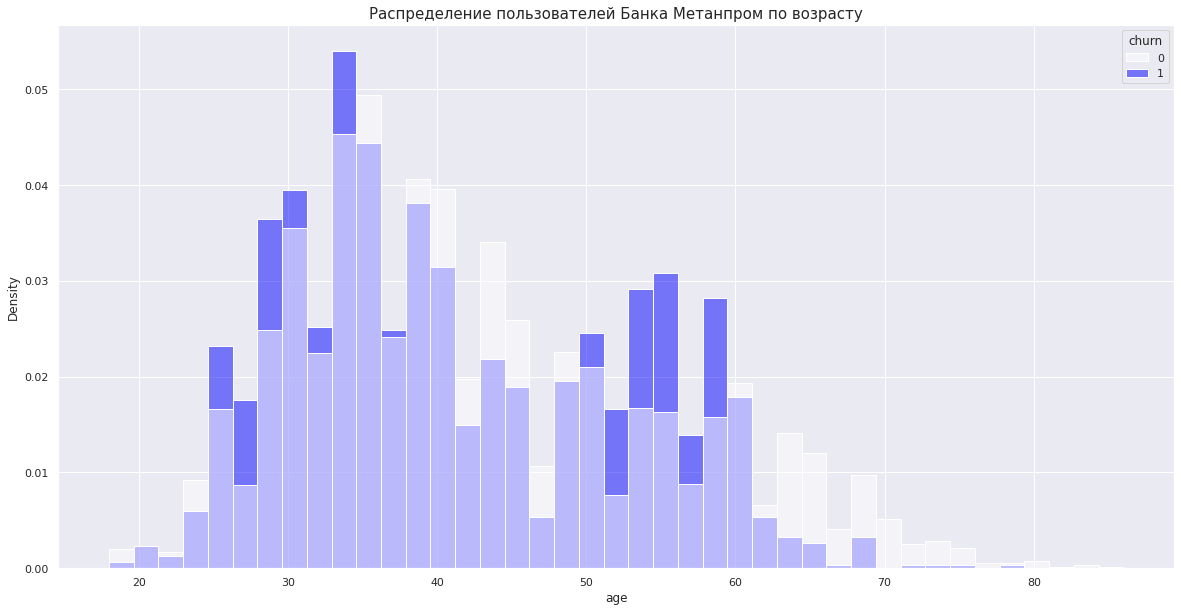

In [18]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.histplot(data=data, hue='churn', x='age', stat='density', common_norm=False, palette='flag')
plt.title('Распределение пользователей Банка Метанпром по возрасту', size=15)
plt.show()

*Большая часть пользователей банка - люди в возрасте от 25 до 60 лет*.
*Наибольший отток среди пользователей*:
- *от 25 до 35 лет*;
- *от 50 до 60 лет*.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

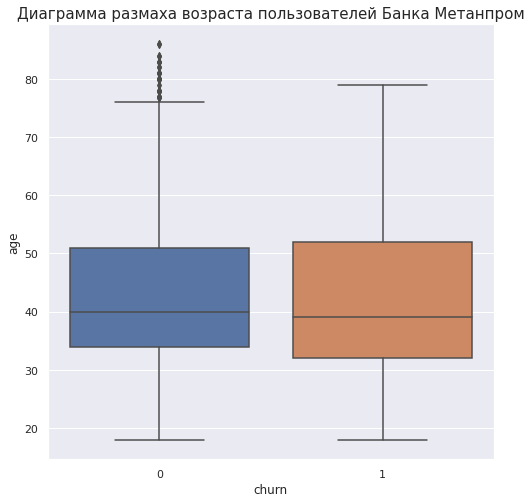

In [19]:
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.boxplot(x='churn', y='age', data=data) 
plt.title('Диаграмма размаха возраста пользователей Банка Метанпром', size=15)
plt.show()

*Возраст пользователей, оставшихся в банке, от 18 до 86 лет. Типичному пользователю из этой группы ~ 40 лет.*

*Возраст пользователей, покинувших банк, от 18 до 79 лет. Типичному пользователю из этой группы ~ 39 лет.*

*Предполагаем, что отток пользователей с возрастом не связан.*

####  Соотношение пользователей по полу
- столбчатая диаграмма по признаку gender с детализацией по churn.

In [20]:
table_2 = data.pivot_table(index=['gender', 'churn'], values='user_id', aggfunc='count').reset_index()
table_2

gender  churn  user_id
0      Ж      0     4358
1      Ж      1      637
2      М      0     3822
3      М      1     1183

In [21]:
fig = px.bar(table_2, x='gender', y='user_id', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром по полу")
fig.show()

*Пользователей мужского и женского пола поровну.*

*Пользователи женского пола больше склонны оставаться в банке, а пользователи мужского пола больше склонны уходить из него.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Распределение пользователей по городам
- круговая диаграмма по столбцу city;
- столбчатая диаграмма по признаку city с детализацией по churn.

In [22]:
table_3 = data.pivot_table(index=['city', 'churn'], values='user_id', aggfunc='count').reset_index()
table_3

city  churn  user_id
0     Ростов      0     1151
1     Ростов      1      266
2    Рыбинск      0     2258
3    Рыбинск      1      437
4  Ярославль      0     4771
5  Ярославль      1     1117

In [23]:
fig = go.Figure(data=[go.Pie(labels=table_3['city'], values=table_3['user_id'])])
fig.update_layout(title="Соотношение пользователей Банка Метанпром по городам")
fig.show() 

*Пропорции распределения пользователей по городам соответствуют реальности: Ярославль - самый крупный город по населению, на втором месте Рыбинск, на третьем - Ростов.*

In [24]:
fig = px.bar(table_3, x='user_id', y='city', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром по городам")
fig.show()

*Типичный ушедший из банка пользователь с наибольшей долей вероятности живет в Ярославле, чем в Рыбинске или Ростове.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Распределение пользователей банка с т.з. кредитного скоринга
- гистограмма по столбцу score;
- диаграмма размаха (определение границ нормы и выбросов).

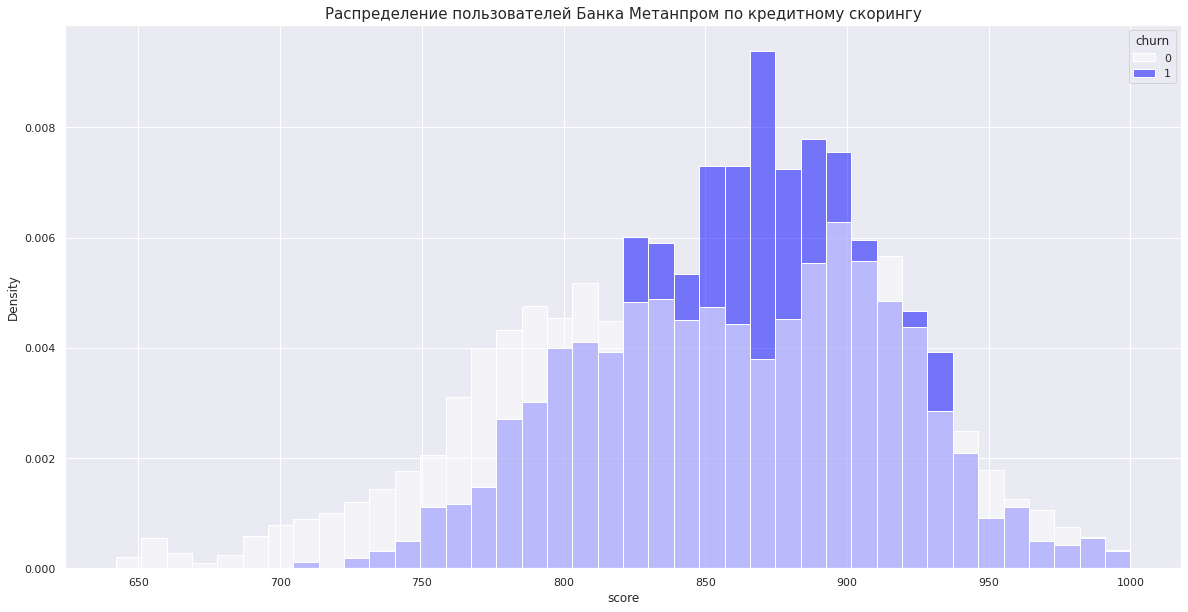

In [25]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.histplot(data=data, hue='churn', x='score', stat='density', common_norm=False, palette='flag')
plt.title('Распределение пользователей Банка Метанпром по кредитному скорингу', size=15)
plt.show()

*У основной массы клиентов банка кредитный скоринг от 750 до 950 баллов.*

*При этом у ушедших клиентов средний кредитный скоринг выше, чем у оставшихся.*

*Особенно выделяется группа пользователей со скорингом от 825 до 940 баллов - среди ушедших пользователей с таким скорингом было больше всего.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

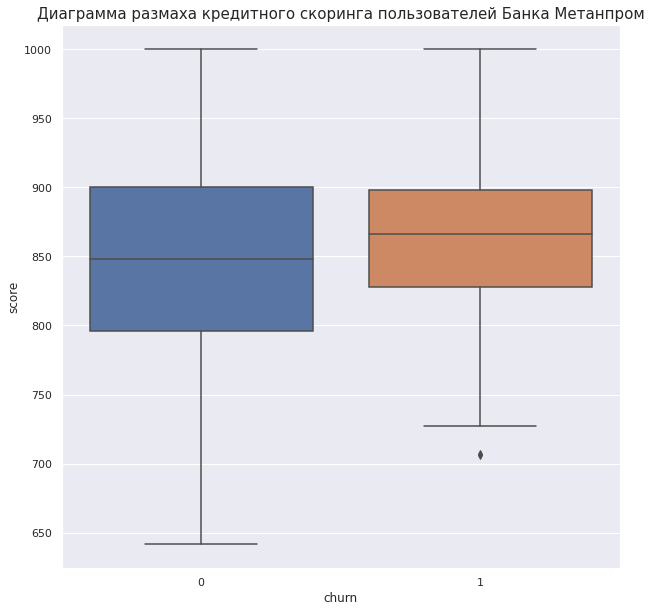

In [26]:
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.boxplot(x='churn', y='score', data=data) 
plt.title('Диаграмма размаха кредитного скоринга пользователей Банка Метанпром', size=15)
plt.show()

*Кредитный скоринг оставшихся пользователей: от 630 до 1000 баллов. Типичное значение - 850 баллов.*

*Кредитный скоринг ушедших пользователей: от 725 до 1000 баллов. Типичное значение - 865 баллов.*

*Мы видим, что кредитный скоринг у ушедшего пользователя вероятно будет выше, чем у оставшегося.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

####  Распределение пользователей с т.з. баллов собственности

- столбчатая диаграмма по признаку equity с детализацией по churn.

In [27]:
table_4 = data.pivot_table(index=['equity', 'churn'], values='user_id', aggfunc='count').reset_index()
table_4

equity  churn  user_id
0        0      0     2502
1        0      1       90
2        1      0      681
3        1      1       93
4        2      0      886
5        2      1      166
6        3      0     1221
7        3      1      322
8        4      0     1386
9        4      1      464
10       5      0     1341
11       5      1      577
12       6      0      103
13       6      1       58
14       7      0       43
15       7      1       37
16       8      0       11
17       8      1        6
18       9      0        6
19       9      1        7

In [28]:
fig = px.bar(table_4, x='equity', y='user_id', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром с т.з. баллов собственности")
fig.show()

*Самая большая группа пользователей не имеет собственности, при этом отток из этой группы небольшой.*

*Наибольшая доля ушедших пользователей банка среди пользователей, у которых от 2 до 5 баллов собственности.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

####  Распределение пользователей с т.з. баланса на счете
- гистограмма по столбцу balance;
- диаграмма размаха (определение границ нормы и выбросов).

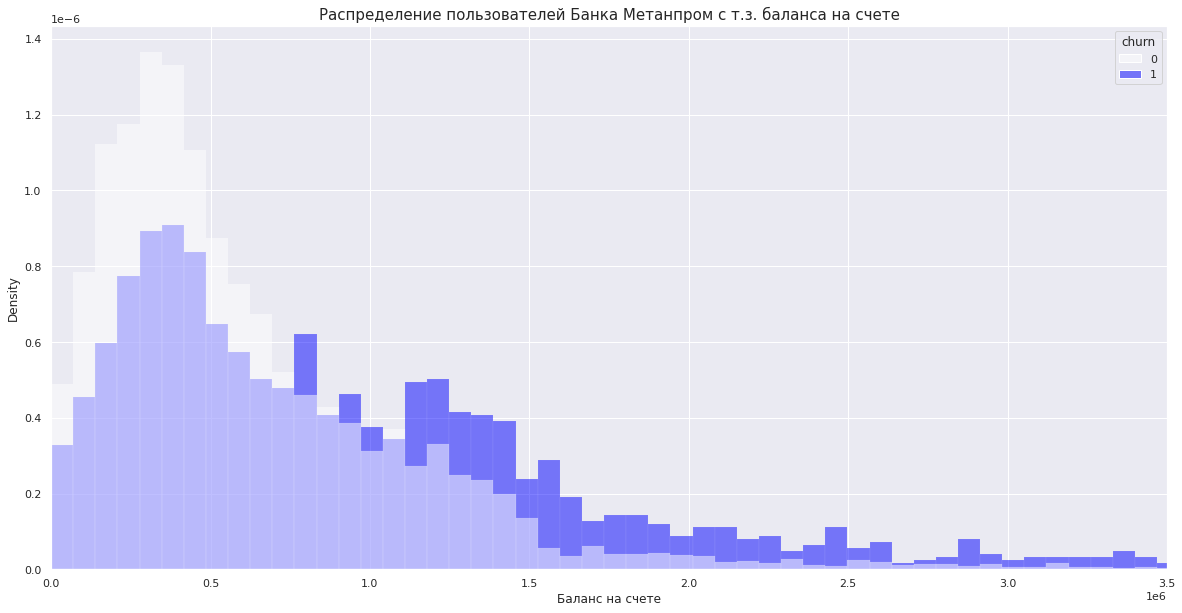

In [29]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.histplot(data=data, hue='churn', x='balance', stat='density', common_norm=False, palette='flag')
plt.xlim(0, 3500000)
plt.title('Распределение пользователей Банка Метанпром с т.з. баланса на счете', size=15)
plt.xlabel('Баланс на счете')
plt.show()

*На визуализации мы видим, что у большинства пользователей банка до 1,5 М на счете. У большей части отточных клиентов баланс в этом же диапазоне*. 

*В категории пользователей с балансом от 1,5 М мы видим, что доля ушедших пользователей преобладают над оставшимися.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [30]:
data['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

*У типичного пользователя банка на балансе 0,52 М.* 

*Есть пользователи с 0 на счету, есть пользователь с 119 М на счету.*

*Поскольку речь идет о деньгах, суммы на счетах пользователей могут быть любыми, поэтому "выбросы" мы удалять не будем."*

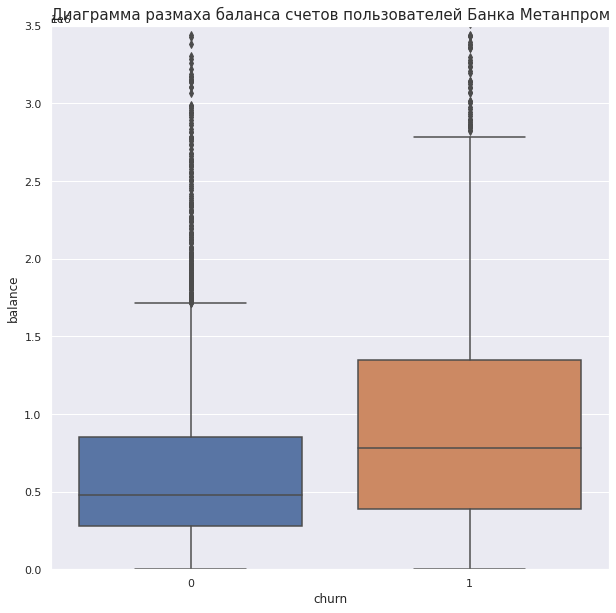

In [31]:
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.boxplot(x='churn', y='balance', data=data) 
ax.set_ylim(0, 3500000)
plt.title('Диаграмма размаха баланса счетов пользователей Банка Метанпром', size=15)
plt.show()

*У типичного оставшегося пользователя банка на счету около 0,5 М (от 0 до 1,75 М). Кроме того есть довольно много нетипичных пользователей с балансом от 1,75 М.*

*У типичного ушедшего пользователя на счету около 0,75 М (от 0 до 2,75 М). Кроме того есть довольно много нетипичных пользователей с балансом от 2,75 М.*

*Банк теряет пользователей с балансом на счете выше среднего по выборке.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Распределение пользователей по кол-ву используемых продуктов банка
- столбчатая диаграмма по признаку products с детализацией по churn.

In [32]:
table_5 = data.pivot_table(index=['products', 'churn'], values='user_id', aggfunc='count').reset_index()
table_5

products  churn  user_id
0          0      1        1
1          1      0     3106
2          1      1      235
3          2      0     4147
4          2      1      979
5          3      0      742
6          3      1      297
7          4      0      174
8          4      1      300
9          5      0       11
10         5      1        8

In [33]:
fig = px.bar(table_5, x='products', y='user_id', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром с т.з. кол-ва используемых продуктов")
fig.show()

*Есть пользователь, у которого нет используемых продуктов. Вероятно, это ошибка.*

In [34]:
data.query('products == 0')

user_id  score     city gender   age  equity  balance  products  \
8957   147837  962.0  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

*1 продукт точно есть - открытый счет, на котором нулевой баланс.*

In [35]:
data['products'] = data['products'].replace(0, 1)

In [36]:
table_5 = data.pivot_table(index=['products', 'churn'], values='user_id', aggfunc='count').reset_index()
table_5

products  churn  user_id
0         1      0     3106
1         1      1      236
2         2      0     4147
3         2      1      979
4         3      0      742
5         3      1      297
6         4      0      174
7         4      1      300
8         5      0       11
9         5      1        8

In [37]:
fig = px.bar(table_5, x='products', y='user_id', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром с т.з. кол-ва используемых продуктов")
fig.show()

*У большинства пользователей 1-2 продукта.*

*Наибольший отток наблюдается среди пользователей, у которых 2-4 продукта банка.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

####  Соотношение пользователей по наличию кредитной карты
- круговая диаграмма по столбцу credit_card;
- столбчатая диаграмма по признаку credit_card с детализацией по churn.

In [38]:
table_6 = data.pivot_table(index='credit_card', values='user_id', aggfunc='count').reset_index()
table_6

credit_card  user_id
0            0     3196
1            1     6804

In [39]:
fig = go.Figure(data=[go.Pie(labels=['Доля пользователей без кредитной карты', 'Доля пользователей с кредитной картой'], values=table_6['user_id'])])
fig.update_layout(title="Соотношение пользователей Банка Метанпром по наличию кредитной карты")
fig.show() 

*У большей части пользователей банка есть кредитная карта - 68%.*

In [40]:
table_7 = data.pivot_table(index=['credit_card', 'churn'], values='user_id', aggfunc='count').reset_index()
table_7

credit_card  churn  user_id
0            0      0     2379
1            0      1      817
2            1      0     5801
3            1      1     1003

In [41]:
fig = px.bar(table_7, x='credit_card', y='user_id', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром по наличию кредитной карты")
fig.show()

*Наибольший отток наблюдается среди пользователей без кредитной карты.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

####  Соотношение пользователей по наличию активности
- круговая диаграмма по столбцу last_activity;
- столбчатая диаграмма по признаку last_activity с детализацией по churn.

In [42]:
table_8 = data.pivot_table(index='last_activity', values='user_id', aggfunc='count').reset_index()
table_8

last_activity  user_id
0              0     4765
1              1     5235

In [43]:
fig = go.Figure(data=[go.Pie(labels=['Доля неактивных пользователей', 'Доля активных пользователей'], values=table_8['user_id'])])
fig.update_layout(title="Соотношение пользователей Банка Метанпром по наличию активности")
fig.show() 

*Доля активных и неактивных пользователей почти равны.*

In [44]:
table_9 = data.pivot_table(index=['last_activity', 'churn'], values='user_id', aggfunc='count').reset_index()
table_9

last_activity  churn  user_id
0              0      0     4223
1              0      1      542
2              1      0     3957
3              1      1     1278

In [45]:
fig = px.bar(table_9, x='last_activity', y='user_id', color='churn')
fig.update_layout(title="Распределение пользователей Банка Метанпром по наличию активности")
fig.show()

*Отток пользователей среди активыных пользователей выше, чем среди неактивных.*

*Может дело в качестве обслуживания, работе приложения или продуктах банка?*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

####  Распределение пользователей с т.з. оценочного уровня дохода
- гистограмма по столбцу EST_SALARY;
- диаграмма размаха (определение границ нормы и выбросов).

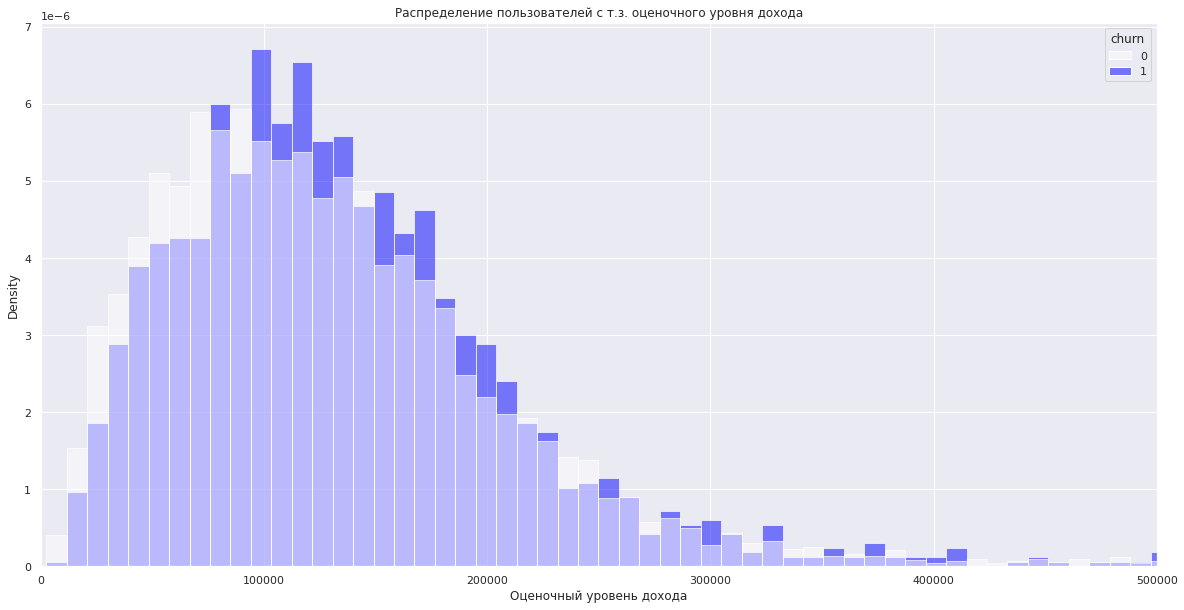

In [46]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.histplot(data=data, hue='churn', x='est_salary', stat='density', common_norm=False, palette='flag')
plt.xlim(0, 500000)
plt.title('Распределение пользователей с т.з. оценочного уровня дохода')
plt.xlabel('Оценочный уровень дохода')
plt.show()

*Оценочный уроведь дохода большинства пользователей банка от 20 до 250 тыс.*

*Среди пользователей с доходом от 100 тыс. доля ушедших из банка становится выше.*

In [47]:
data['est_salary'].describe()

count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: est_salary, dtype: float64

*Оценочный доход типичного пользователя банка - 120 тыс.*

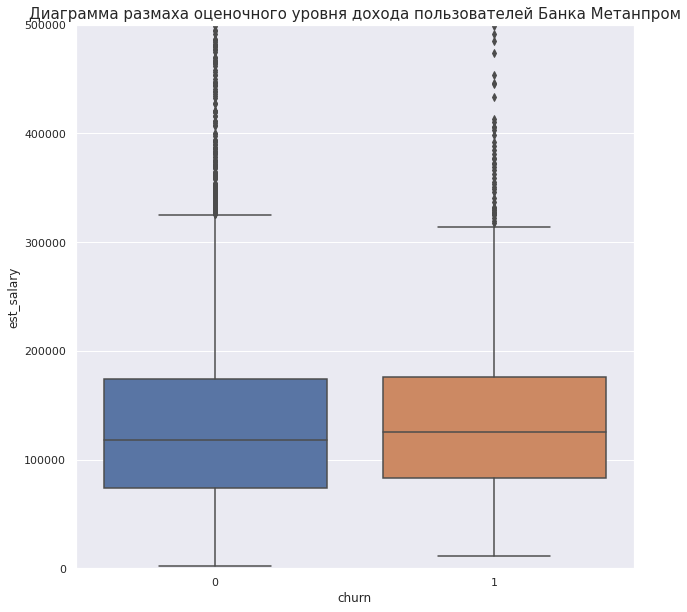

In [48]:
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.boxplot(x='churn', y='est_salary', data=data) 
ax.set_ylim(0, 500000)
plt.title('Диаграмма размаха оценочного уровня дохода пользователей Банка Метанпром', size=15)
plt.show()

*Диаграммы размаха оценочного уровня дохода для оставшихся и ушедших пользователей очень похожи, однако размах значений у оставшихся пользователей больше, а средний доход ушедших пользователей чуть выше.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Составление портретов клиентов
- среднего клиента банка;
- склонного к уходу из банка;
- не склонного к уходу из банка.

In [49]:
df = data

In [50]:
df['city_1'] = df['city']
df['gender_1'] = df['gender']
df = pd.get_dummies(df, columns = ['city_1'], prefix = '', prefix_sep = '')
df = pd.get_dummies(df, columns = ['gender_1'], prefix = '', prefix_sep = '')
df.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  Ростов  Рыбинск  Ярославль  \
0            0              1    75719.14      1       0        1          0   
1            1              0    86621.77      0       0        1          0   
2            1              1   107683.34      0       0        1          0   
3            0              1   174423.53      1       0        0          1   
4            1              0    67353.16      1       0        0          1   

   Ж  М  
0  1  0  
1  1  0  
2  1  0  
3  1  0  
4  0  1

In [51]:
table_10 = df.pivot_table(columns='churn', values=['score','age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М'], aggfunc='median').reset_index()
table_10 = table_10.rename(columns={'index': 'Характеристика', 0: 'Оставшийся клиент', 1: 'Ушедший клиент'})
table_10['Оставшийся клиент'] = round(table_10['Оставшийся клиент'], 2)
table_10['Средний клиент'] = round((table_10['Оставшийся клиент'] + table_10['Ушедший клиент'])/2, 2)
table_10

churn Характеристика  Оставшийся клиент  Ушедший клиент  Средний клиент
0                age              40.00           39.00           39.50
1            balance          475382.44       782410.47       628896.45
2        credit_card               1.00            1.00            1.00
3             equity               3.00            4.00            3.50
4         est_salary          118257.72       125390.62       121824.17
5      last_activity               0.00            1.00            0.50
6           products               2.00            2.00            2.00
7              score             848.00          866.00          857.00
8                  Ж               1.00            0.00            0.50
9                  М               0.00            1.00            0.50
10            Ростов               0.00            0.00            0.00
11           Рыбинск               0.00            0.00            0.00
12         Ярославль               1.00            1.00            1.00

*Средний клиент банка:*

- с равной долей вероятности может быть женщиной или мужчиной;
- возраст 39,5 лет;
- живет в Ярославле;
- имеет на счету сумму 628 896.45;
- по оценкам банка имеет ежемесячный доход около 121 824.17;
- имеет кредитную карту;
- по оценкам банка у него 3-4 баллов собственности;
- с равной долей вероятности может быть как активным, так и неактивным клиентом банка;
- использует 2 продукта банка (как раз открытый счет + кредитная карта);
- кредитный скоринг - 857 баллов из 1000.

*Средний оставшийся клиент банка:*
- с большей долей вероятности является женщиной;
- возраст 40 лет;
- живет в Ярославле;
- имеет на счету сумму 475 382.44;
- по оценкам банка имеет ежемесячный доход около 118 257.72;
- имеет кредитную карту;
- по оценкам банка у него 3 балла собственности;
- с большей долей вероятности является неактивным клиентом банка;
- использует 2 продукта банка (как раз открытый счет + кредитная карта);
- кредитный скоринг - 848 баллов из 1000.

*Средний ушедший клиент банка:*
- с большей долей вероятности является мужчиной;
- возраст 39 лет;
- живет в Ярославле;
- имеет на счету сумму 782 410.47;
- по оценкам банка имеет ежемесячный доход около 125 390.62;
- имеет кредитную карту;
- по оценкам банка у него 4 балла собственности;
- с большей долей вероятности является активным клиентом банка;
- использует 2 продукта банка (как раз открытый счет + кредитная карта);
- кредитный скоринг - 866 баллов из 1000.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Исследование корреляций

In [52]:
df = df.drop('user_id', axis='columns')
df = df.drop('gender', axis='columns')
df = df.drop('city', axis='columns')
df.head()

score   age  equity     balance  products  credit_card  last_activity  \
0  850.0  25.0       1    59214.82         2            0              1   
1  861.0  37.0       5   850594.33         3            1              0   
2  892.0  30.0       0         NaN         1            1              1   
3  866.0  51.0       5  1524746.26         2            0              1   
4  730.0  34.0       5      174.00         1            1              0   

   est_salary  churn  Ростов  Рыбинск  Ярославль  Ж  М  
0    75719.14      1       0        1          0  1  0  
1    86621.77      0       0        1          0  1  0  
2   107683.34      0       0        1          0  1  0  
3   174423.53      1       0        0          1  1  0  
4    67353.16      1       0        0          1  0  1

In [53]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М']


score   age  equity  balance  products  credit_card  \
score           1.00  0.03    0.53     0.17      0.42         0.21   
age             0.03  1.00    0.05     0.02      0.14         0.16   
equity          0.53  0.05    1.00     0.00      0.58         0.22   
balance         0.17  0.02    0.00     1.00      0.00         0.00   
products        0.42  0.14    0.58     0.00      1.00         0.27   
credit_card     0.21  0.16    0.22     0.00      0.27         1.00   
last_activity   0.05  0.09    0.05     0.00      0.11         0.05   
est_salary      0.40  0.36    0.29     0.37      0.22         0.04   
churn           0.23  0.19    0.35     0.02      0.26         0.20   
Ростов          0.09  0.07    0.07     0.00      0.05         0.15   
Рыбинск         0.03  0.06    0.00     0.02      0.08         0.08   
Ярославль       0.08  0.09    0.05     0.05      0.11         0.18   
Ж               0.07  0.29    0.06     0.05      0.07         0.20   
М               0.07  0.29    0.06     0.05      0.07         0.20   

               last_activity  est_salary  churn  Ростов  Рыбинск  Ярославль  \
score                   0.05        0.40   0.23    0.09     0.03       0.08   
age                     0.09        0.36   0.19    0.07     0.06       0.09   
equity                  0.05        0.29   0.35    0.07     0.00       0.05   
balance                 0.00        0.37   0.02    0.00     0.02       0.05   
products                0.11        0.22   0.26    0.05     0.08       0.11   
credit_card             0.05        0.04   0.20    0.15     0.08       0.18   
last_activity           1.00        0.05   0.26    0.00     0.07       0.07   
est_salary              0.05        1.00   0.05    0.14     0.10       0.18   
churn                   0.26        0.05   1.00    0.00     0.05       0.03   
Ростов                  0.00        0.14   0.00    1.00     0.38       0.69   
Рыбинск                 0.07        0.10   0.05    0.38     1.00       0.91   
Ярославль               0.07        0.18   0.03    0.69     0.91       1.00   
Ж                       0.01        0.14   0.22    0.02     0.02       0.04   
М                       0.01        0.14   0.22    0.02     0.02       0.04   

                  Ж     М  
score          0.07  0.07  
age            0.29  0.29  
equity         0.06  0.06  
balance        0.05  0.05  
products       0.07  0.07  
credit_card    0.20  0.20  
last_activity  0.01  0.01  
est_salary     0.14  0.14  
churn          0.22  0.22  
Ростов         0.02  0.02  
Рыбинск        0.02  0.02  
Ярославль      0.04  0.04  
Ж              1.00  1.00  
М              1.00  1.00

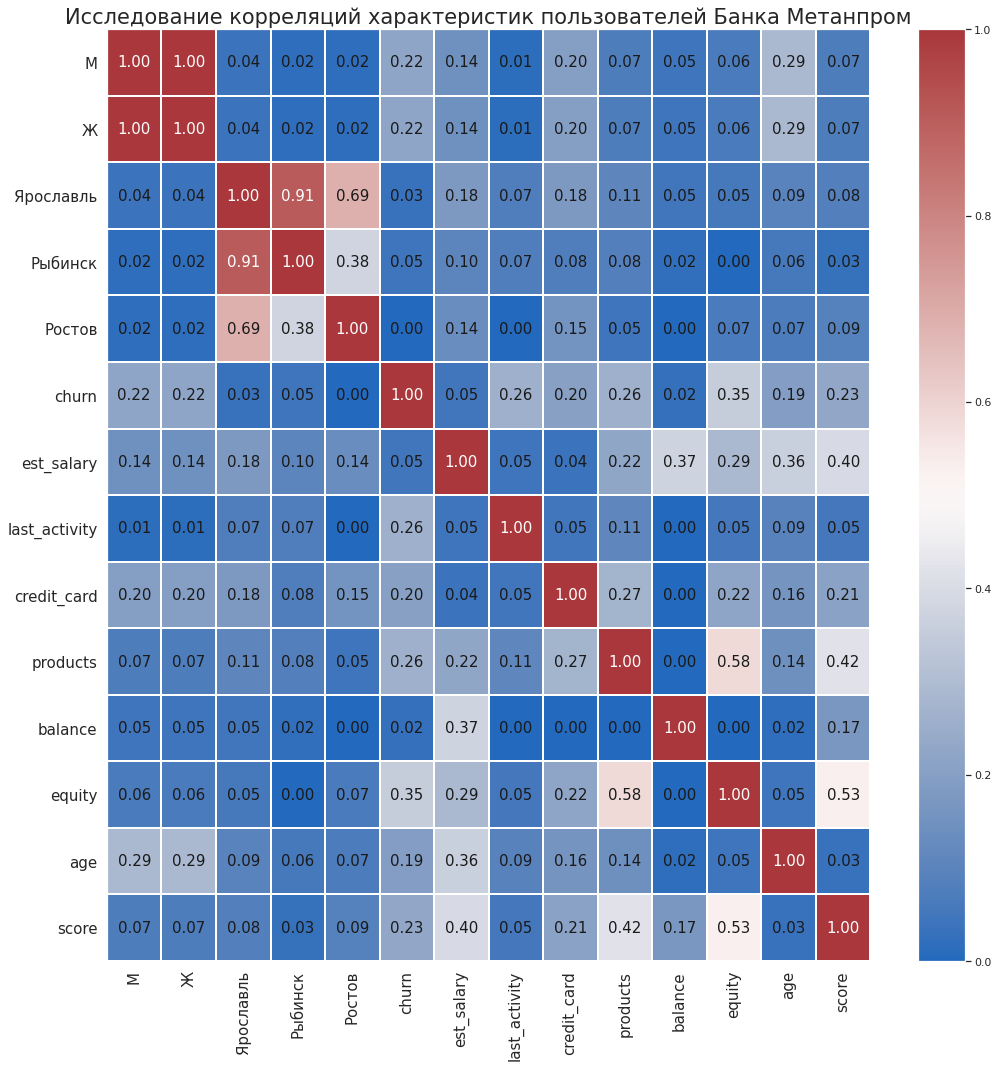

In [54]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, vmin=0, vmax=1, color_map='vlag', title=r"Исследование корреляций характеристик пользователей Банка Метанпром", fontsize_factor=1.5, figsize=(15, 15))
plt.tight_layout()

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> user_id не является признаком и не должен попадать в расчет корреляций. корреляция Пирсона не может использоваться для категориальных признаков. зависимости нужно смотреть между признаками, а не между их значениями, то есть город и пол долджны быть в одном столбце и исследованы (как и другие категориальные) подходящим методом корреляции</s>
</div>

 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Удалила столбцы user_id, gender, city. Использовала phik для построения корреляций. </div>

*На отток влияют признаки: score, age, equity, products, credit_card, last_activity и пол.*

*Проверим значимость найденных корреляций.*

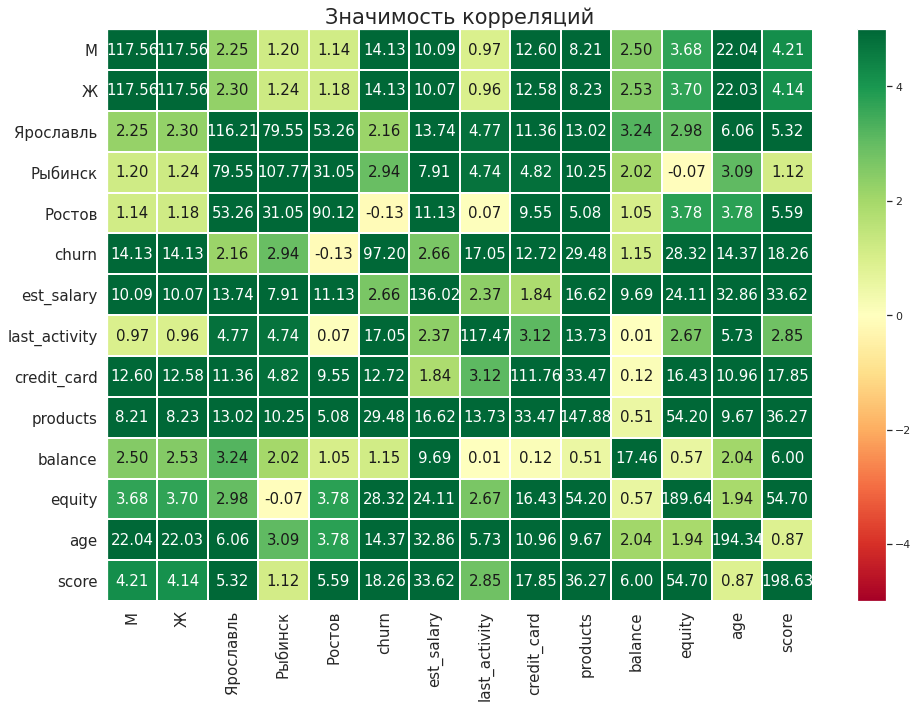

In [55]:
interval_cols = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М']

significance_overview = df.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, y_labels=significance_overview.index, vmin=-5, vmax=5, title="Значимость корреляций", usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

*Все найденные корреляции значимы.*

*Выделим корреляции для churn в отдельный столбец.*

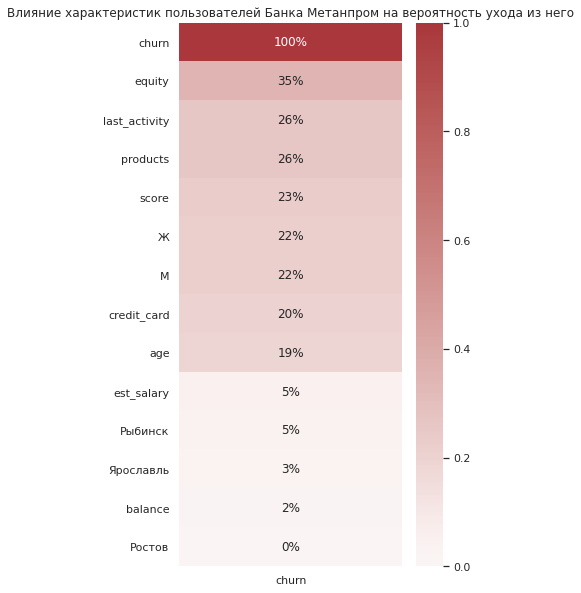

In [56]:
sns.set(rc={'figure.figsize':(5, 10)})
sns.heatmap(phik_overview.loc[:, ['churn']].sort_values(by = 'churn', ascending=False), annot=True, fmt=".0%", cmap='vlag', center=0)
plt.title('Влияние характеристик пользователей Банка Метанпром на вероятность ухода из него')
plt.show()

*Исходя из полученной визуализации корреляций между различными характеристиками пользователей и их оттоком, можем выделить признаки, которые с большей долей вероятности оказывают влияние на решение пользователя уйти из банка:*
- количество баллов собственности;
- активность пользователя;
- количество используемых продуктов;
- скоринг;
- пол;
- наличие кредитной карты;
- возраст.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Наблюдения и выводы по шагу

Банк Метанпром покинуло 18,2% пользователей согласно предоставленной выборке данных.

Банк теряет экономически активных пользователей, находящихся в возрасте от 25 до 60 лет. 
Возраст пользователей на отток не влияет.

Среди пользователей банка женщин и мужчин примерно одинаковое количество. 
Среди ушедших пользователей больше мужчин.

58,9 % пользователей из Ярославля, 27% из Рыбинска, 14,2% из Ростова.
Больше всего ушедших пользователей из Ярославля, что объясняется тем, что это самый крупный город из 3х представленных в выборке.

Кредитный скоринг типичного ушедшего пользователя чуть выше, чем у оставшегося: 865 против 850 баллов.
Это связано с более высокими доходами и более высокими баллами собственности, чем у оставшихся в банке пользователей.

Из банка чаще уходят пользователи, у которых есть собственность (1-5 баллов), чем те, у которых ее нет (0 баллов).

Банк теряет пользователей с балансом на счете выше среднего по выборке.
У типичного ушедшего пользователя на балансе было больше денег, чем у оставшихся: 0,75 М против 0,5 М.

У большинства пользователей 1-2 продукта.
Наибольший отток наблюдается среди пользователей, у которых 2-4 продукта банка.

У большей части пользователей банка есть кредитная карта - 68%.
Она может быть фактором, удерживающим клиента в банке, т.к. доля ушедших клиентов выше среди пользователей без карты, чем среди пользователей с картой.

Активных и неактивных пользователей примерно поровну, при этом доля отточных клиентов выше среди активных пользователей. Было бы интересно посмотреть обратную связь от таких пользователей.

Оценочный доход типичного пользователя банка - 120 тыс.
Доход на отточность не влияет.

На основе исследования этих характеристик нами были составлены портреты клиентов ушедших и оставшихся.
При их сравнении мы приходим к выводу о том, что банк теряет ценных клиентов с накоплениями выше, чем в среднем по банку, с чуть более высокими доходами, с высокими баллами собственности и кредитным скорингом.

Анализ корреляций позволил нам выделить 3 признака, которые с большей долей вероятности оказывают влияние на решение пользователя уйти из банка:

- количество используемых продуктов;
- количество баллов собственности;
- активность пользователя.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Проверка гипотез

### Формирование выборок

*Отточные клиенты*

In [57]:
data_churn = df.query('churn == 1')
data_churn.head()

score   age  equity     balance  products  credit_card  last_activity  \
0   850.0  25.0       1    59214.82         2            0              1   
3   866.0  51.0       5  1524746.26         2            0              1   
4   730.0  34.0       5      174.00         1            1              0   
12  845.0  31.0       3   591928.52         2            1              1   
40  811.0  34.0       2   129799.35         1            0              0   

    est_salary  churn  Ростов  Рыбинск  Ярославль  Ж  М  
0     75719.14      1       0        1          0  1  0  
3    174423.53      1       0        0          1  1  0  
4     67353.16      1       0        0          1  0  1  
12   112697.16      1       0        0          1  1  0  
40    96242.71      1       0        1          0  0  1

*Оставшиеся клиенты*

In [58]:
data_stay = df.query('churn == 0')
data_stay.head()

score   age  equity    balance  products  credit_card  last_activity  \
1  861.0  37.0       5  850594.33         3            1              0   
2  892.0  30.0       0        NaN         1            1              1   
5  856.0  56.0       4  863687.24         3            1              0   
6  807.0  39.0       3  405042.44         3            0              1   
7  825.0  38.0       4  458145.40         2            1              1   

   est_salary  churn  Ростов  Рыбинск  Ярославль  Ж  М  
1    86621.77      0       0        1          0  1  0  
2   107683.34      0       0        1          0  1  0  
5   156619.80      0       0        1          0  0  1  
6   103838.32      0       0        0          1  1  0  
7    68085.48      0       0        0          1  1  0

### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались

- Нулевая гипотеза: средние значения совокупностей равны.
- Альтернативная гипотеза: средние значения совокупностей не равны.

In [59]:
# задаём уровень значимости
alpha = 0.05

# доходы первой группы пользователей (ушедшие)
first_group_total = data_churn['est_salary'] 

# траты второй группы пользователей (оставшиеся)
second_group_total = data_stay['est_salary']

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(first_group_total, second_group_total, alternative= 'two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.8987254468291451
Нет оснований отвергнуть нулевую гипотезу


*Стат. тест показал, что ушедшие и оставшиеся пользователи вероятно имеют равные доходы.*

### Проверка гипотезы различия кредитного скоринга клиентов, которые ушли и тех, которые остались
- Нулевая гипотеза: средние значения совокупностей равны.
- Альтернативная гипотеза: средние значения совокупностей не равны.

In [60]:
# задаём уровень значимости
alpha = 0.05

# кредин первой группы пользователей (ушедшие)
first_group_total = data_churn['score'] 

# траты второй группы пользователей (оставшиеся)
second_group_total = data_stay['score']

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(first_group_total, second_group_total, alternative= 'two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.28609001980857e-26
Отвергаем нулевую гипотезу


*Стат. тест показал, что кредитные скоринги ушедших и оставшихся пользователей вероятно не равны.*

### Наблюдения и выводы по шагу.

*По результатам проведенных стат. тестов мы пришли к выводам, о том, что:*

- доходы ушедших из банка и оставшихся в нем пользователей вероятно равны;
- кредитные скоринги ушедших и оставшихся пользователей вероятно не равны.

*Это подтверждает и проведенный ранее исследовательский анализ данных.*

<div class="alert alert-success">
<b>👍 Успех:</b> Гипотезы сформулированы и проверены!
</div>

## Сегментация высокоотточных клиентов

### Выделение сегментов клиентов банка

#### Активные клиенты от 30 до 45 лет, которые используют более 1 продукта банка и у которых есть собственность.

In [61]:
df.query('products > 1 and equity > 0 and last_activity == 1 and 30 < age < 45').agg({'churn': ['mean', 'sum', 'count']})

churn
mean      0.357741
sum     513.000000
count  1434.000000

*Отток в сегменте 35,77 %.*

#### Активные клиенты, у которых нет кредитной карты, доход выше 75 тыс. (средняя по РФ с учетом НДФЛ), а скоринг выше 750 баллов.

In [62]:
df.query('last_activity == 1 and score > 750 and credit_card == 0 and est_salary > 75000').agg({'churn': ['mean', 'sum', 'count']})

churn
mean      0.403289
sum     515.000000
count  1277.000000

*Отток в сегменте 40,33 %.*

#### Клиенты мужского пола, у которых больше 1 балла собственности, есть кредитная карта и скоринг выше 800 баллов.

In [63]:
df.query('М == 1 and equity > 1 and credit_card == 1 and score > 800').agg({'churn': ['mean', 'sum', 'count']})

churn
mean      0.320429
sum     538.000000
count  1679.000000

*Отток в сегменте 32,04 %*

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> В 1 и 3 сегменте слишком много клиентов, можно добавить еще какой то признак в срез</s>
</div>

 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавила признаки в п. 1 и 3. </div>

### Отбор лучших сегментов

#### Активные клиенты от 30 до 45 лет, которые используют более 1 продукта банка и у которых есть собственность.

In [64]:
df.query('products > 1 and equity > 0 and last_activity == 1 and 30 < age < 45').pivot_table(index='products', columns='equity', values='churn', aggfunc='sum')

equity       1     2     3     4      5    6    7    8    9
products                                                   
2         13.0  25.0  54.0  94.0  122.0  7.0  8.0  0.0  3.0
3          4.0   4.0  10.0  20.0   26.0  3.0  NaN  1.0  NaN
4          5.0   6.0  19.0  38.0   33.0  8.0  7.0  NaN  0.0
5          0.0   NaN   0.0   1.0    2.0  NaN  NaN  NaN  NaN

In [72]:
df.query('products == 2 and  2 < equity < 6 and last_activity == 1 and 30 < age < 45').pivot_table(index='equity', values='churn', aggfunc=['mean', 'sum', 'count'])

mean   sum count
           churn churn churn
equity                      
3       0.251163    54   215
4       0.329825    94   285
5       0.443636   122   275

*1 сегмент: активные клиенты от 30 до 45 лет, которые используют 2 продукта банка и у которых есть собственность (3-5 баллов).*

#### Активные клиенты, у которых нет кредитной карты, доход выше 74 тыс. (средняя по РФ с учетом НДФЛ), а скоринг выше 750 баллов.

*Визуализируем распределение пользователей, чтобы более точно определить сегмент.*

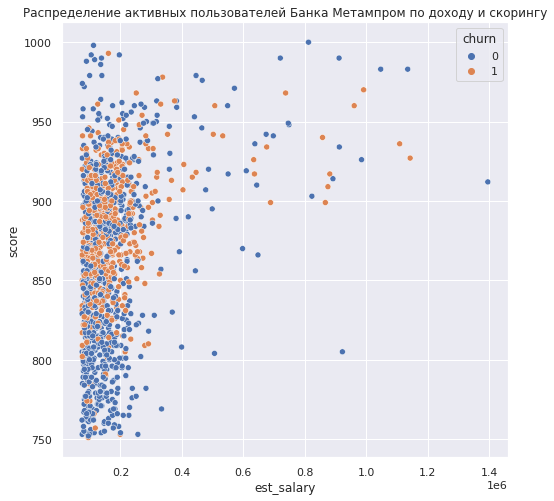

In [66]:
claster_1 = df.query('last_activity == 1 and score > 750 and credit_card == 0 and est_salary > 75000')
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(data=claster_1, x='est_salary', y='score', hue='churn')
plt.title('Распределение активных пользователей Банка Метампром по доходу и скорингу')
plt.show()

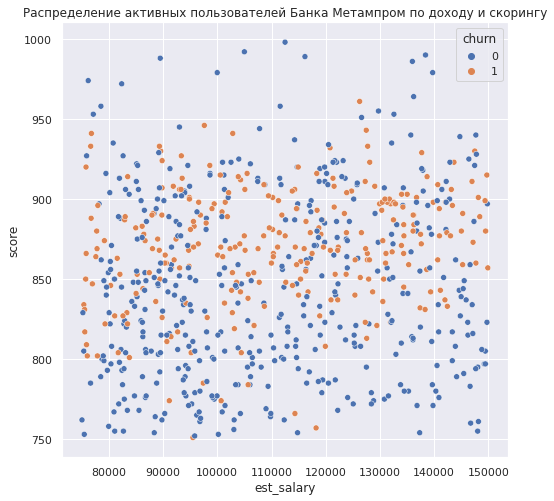

In [67]:
claster_2 = df.query('last_activity == 1 and score > 750 and credit_card == 0 and 75000 < est_salary < 150000')
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(data=claster_2, x='est_salary', y='score', hue='churn')
plt.title('Распределение активных пользователей Банка Метампром по доходу и скорингу')
plt.show()

*Нам нужны пользователи со скорингом от 825 до 950 баллов.*

In [68]:
df.query('last_activity == 1 and 825 < score < 950 and credit_card == 0 and 75000 < est_salary < 150000').agg({'churn': ['mean', 'sum', 'count']})

churn
mean     0.508511
sum    239.000000
count  470.000000

*2 сегмент: активные пользователи без кредитной карты, с оценочным доходом от 75 до 150 тыс.рублей и скорингом от 825 до 950 баллов.*

#### Клиенты мужского пола, у которых больше 1 балла собственности, есть кредитная карта и скоринг выше 800 баллов.

In [69]:
df.query('М == 1 and equity > 1 and credit_card == 1 and score > 800').pivot_table(index='equity', values='churn', aggfunc=['sum', 'mean']).reset_index()

equity   sum      mean
         churn     churn
0      2    59  0.245833
1      3   104  0.288889
2      4   149  0.315678
3      5   191  0.361059
4      6    18  0.367347
5      7    14  0.666667
6      8     2  0.500000
7      9     1  0.250000

In [70]:
df.query('М == 1 and 2 < equity < 6 and credit_card == 1 and score > 800').pivot_table(index='equity', values='churn', aggfunc=['sum', 'mean']).reset_index()

equity   sum      mean
         churn     churn
0      3   104  0.288889
1      4   149  0.315678
2      5   191  0.361059

*3 сегмент: клиенты мужского пола, у которых от 3 до 5 баллов собственности, есть кредитная карта и скоринг выше 800 баллов.*

<div class="alert alert-success">
<b>👍 Успех:</b> Отличные сегменты, молодец!
</div>

### Формулирование рекомендаций

**1 сегмент: активные клиенты от 30 до 45 лет, которые используют 2 продукта банка и у которых есть собственность (3-5 баллов).**

*В целях повышения лояльности и удержания этих клиентов можно предложить для них:* 

- страхование собственности, 
- премиальный сервис (скидки на бренды, vip-зал в аэропортах, выделенный менеджер), 
- вклады с повышенным %, 
- кэшбек на релевантные для них категории.

**2 сегмент: активные пользователи без кредитной карты, с оценочным доходом от 75 до 150 тыс.рублей и скорингом от 825 до 950 баллов.**

*В целях удержания клиентов предложить:*

- оформить кредитную карту с бесплатным обслуживанием и / или с беспроцентным периодом, которая может пригодится на всякий случай;
- оформить карту рассрочки для крупных покупок.

**3 сегмент: клиенты мужского пола, у которых от 3 до 5 баллов собственности, есть кредитная карта и скоринг выше 800 баллов.**

*В целях повышения лояльности и удержания этих клиентов можно предложить для них:*

- страхование собственности, 
- выгодные предложения на товары и услуги, связанные с недвижимостью и автомобилями;
- открытие ИИС / брокерсного счета на выгодных условиях.


## Презентация

https://disk.yandex.ru/i/qWnZkTk_sDxKuA

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Все данные исследованы, много визуализации, сделаны выводы по всем разделам, достаточное количество рассуждений и комментариев, в презентации соблюден баланс текстовой и графической информации
</div>